In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [327]:
df = pd.read_csv('./data/Country-data.csv')
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Validating null values

In [328]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Validating duplicated

In [329]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Distribution Analysis

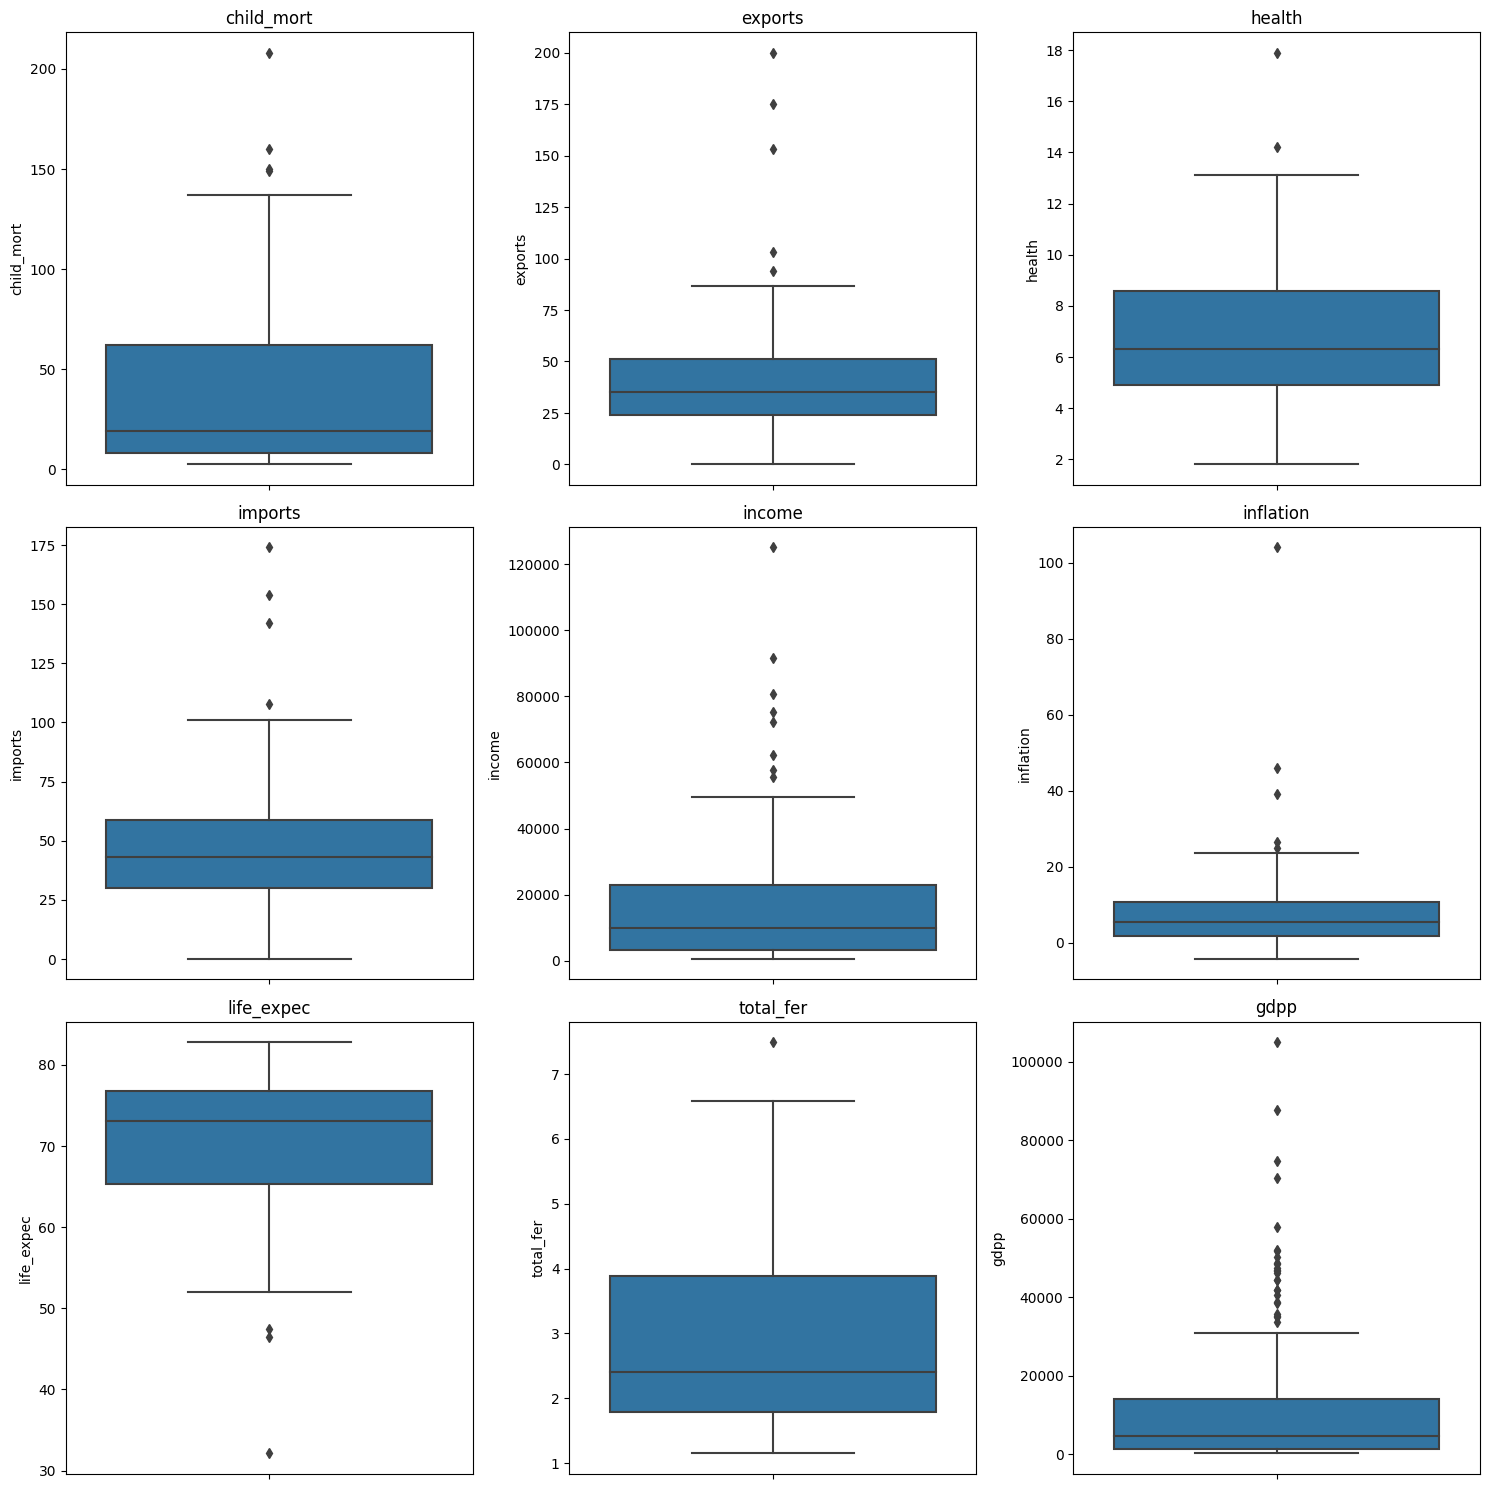

In [330]:
int_cols = df.select_dtypes(exclude='object').columns
num_plots = len(int_cols)
rows = 3  # Número de filas deseadas
cols = num_plots // rows + (num_plots % rows > 0)  # Número de columnas deseadas

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Ajusta el tamaño de la figura según tus necesidades

for i, col in enumerate(int_cols):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  # Obtén el eje correspondiente
    sns.boxplot(data=df, y=col, ax=ax)
    ax.set_title(col)  # Opcional: establece el título de cada gráfico

plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()

In [331]:
def outliers(category):   
    # Calculate the interquartile range (IQR)
    Q1 = df[category].quantile(0.25)
    Q3 = df[category].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers based on the IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[category] < lower_bound) | (df[category] > upper_bound)]
    print("Outliers:")

    outliers_sorted = outliers.sort_values(by=category, ascending=False)

    print(outliers_sorted['country'])

outliers('income')

Outliers:
123                   Qatar
91               Luxembourg
23                   Brunei
82                   Kuwait
133               Singapore
114                  Norway
157    United Arab Emirates
145             Switzerland
Name: country, dtype: object


In [332]:
outliers('inflation')

Outliers:
113              Nigeria
163            Venezuela
103             Mongolia
149          Timor-Leste
49     Equatorial Guinea
Name: country, dtype: object


### Finding correlations

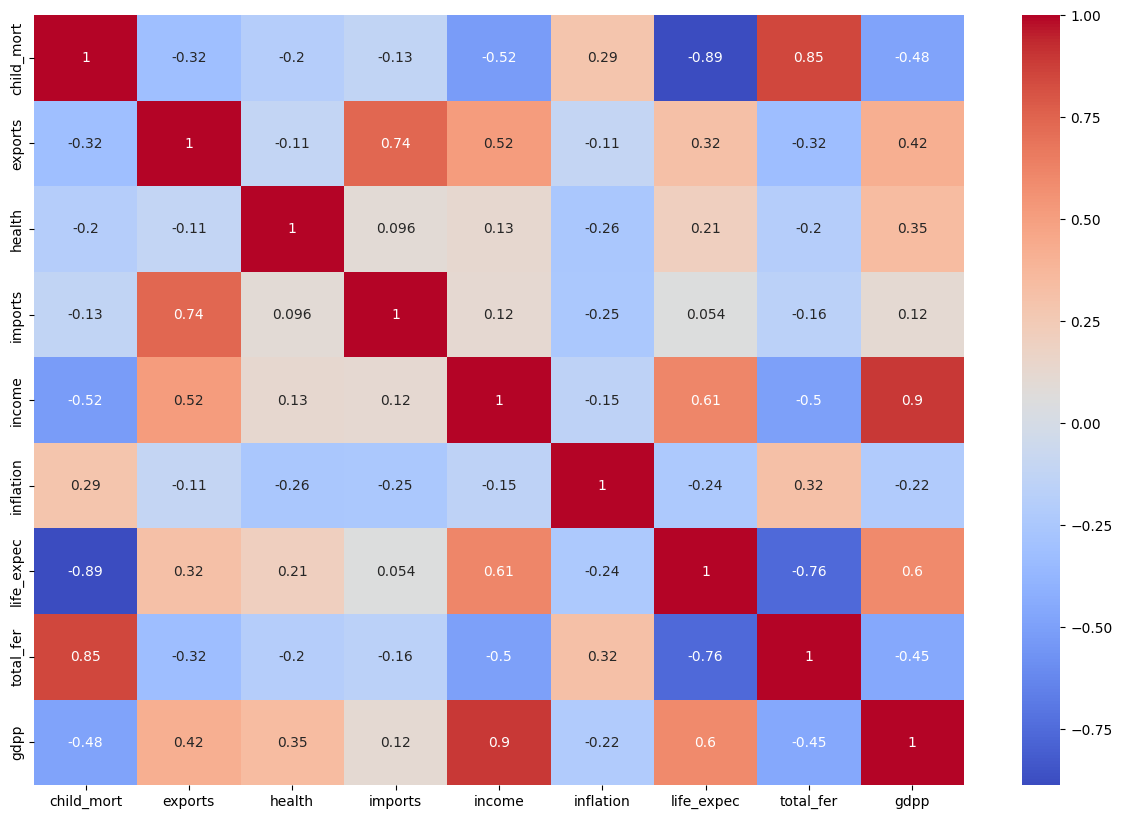

In [333]:
# Compute correlation matrix
corr = df[int_cols].corr()

fig = plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Scaling data

In [334]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.drop('country', axis=1))


In [335]:
df_scaled = pd.DataFrame(df_scaled, columns=df.drop('country', axis=1).columns)

### PCA 
https://mlplaygrounds.com/machine/learning/PCA.html

In [336]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(df_scaled)
pca_data_scaled = pca.transform(df_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [337]:
# Variance depending on the number of components

# Each number represents a number of components in asceding order
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


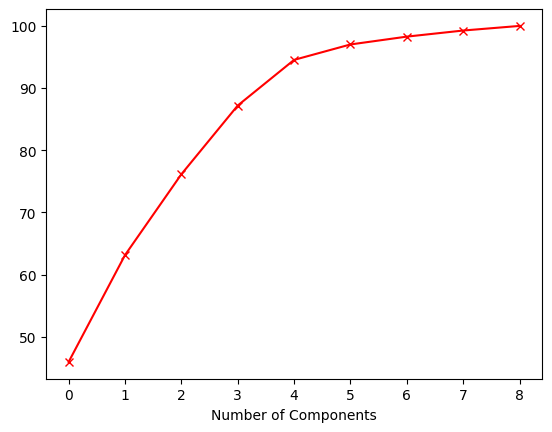

In [338]:
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cum_var, 'r-x')
plt.xlabel('Number of Components')
plt.show()

# This chart shows that with 4 components, we would have around 90% of our variables

In [339]:
# Since the purpose of this is to reduce our dimensionality, we're going to stick with 4 components
pca_data_standard = pd.DataFrame(pca_data_scaled)
# I am going to drop these, since we're already going to use the first 4
pca_data_standard.drop([4,5,6,7,8], axis=1, inplace=True)

In [340]:
# Of course I am losing information, but I am reducing dimensionality as well
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


### Using K-means

In [341]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### PCA

In [342]:
sum_of_squared_distances = []
silhouette_scores= []

K = range(2, 15)

for _ in K:
    km = KMeans(n_clusters=_)
    y = km.fit_predict(pca_data_standard)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard, y))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

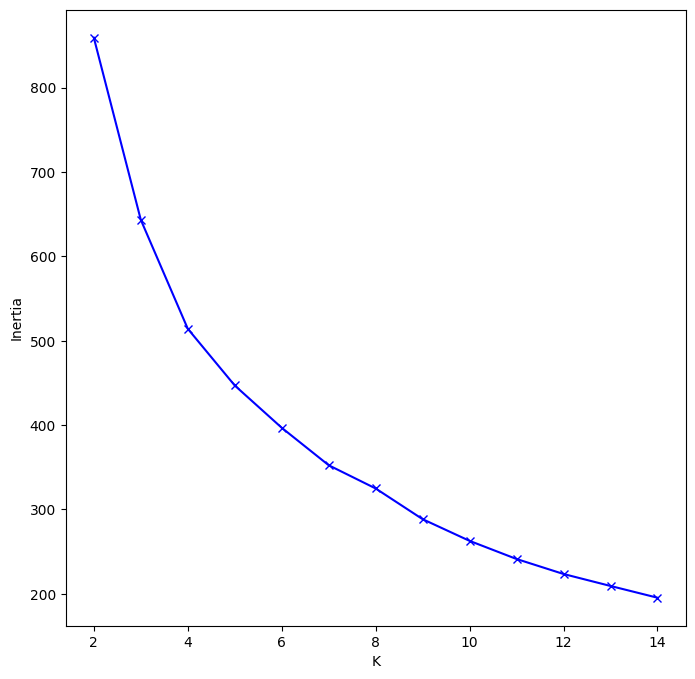

In [343]:
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

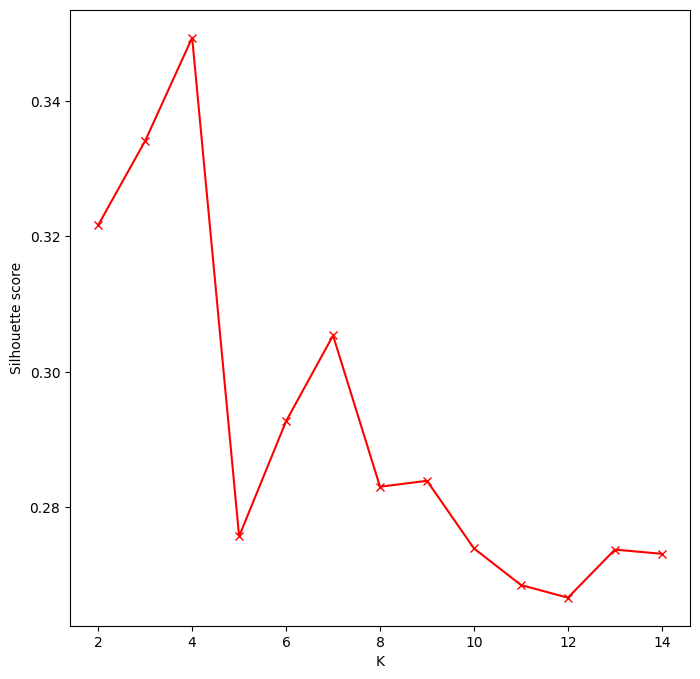

In [344]:
plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

In [345]:
km = KMeans(n_clusters=4)
y = km.fit_predict(pca_data_standard)
df['k_means_pca'] = y

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [346]:
print(silhouette_score(pca_data_standard, y))

0.3519252676725516


### Not PCA

In [347]:
sum_of_squared_distances = []
silhouette_scores= []

K = range(2, 15)

for _ in K:
    km = KMeans(n_clusters=_)
    y = km.fit_predict(df_scaled)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, y))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

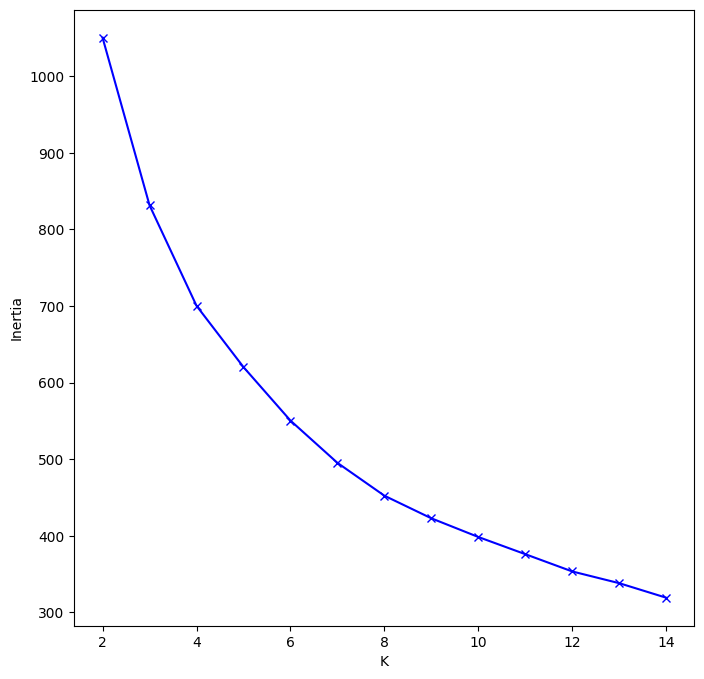

In [348]:
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

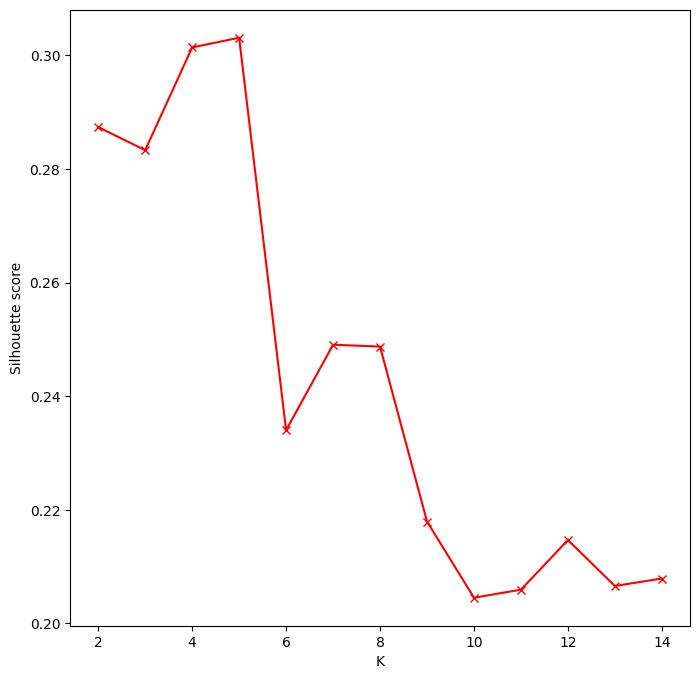

In [349]:
plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

In [350]:
km = KMeans(n_clusters=5)
y = km.fit_predict(df_scaled)
df['k_means'] = y

print(silhouette_score(df_scaled, y))

0.22642429038898562


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Agglomerative hierarchical clustering

### PCA

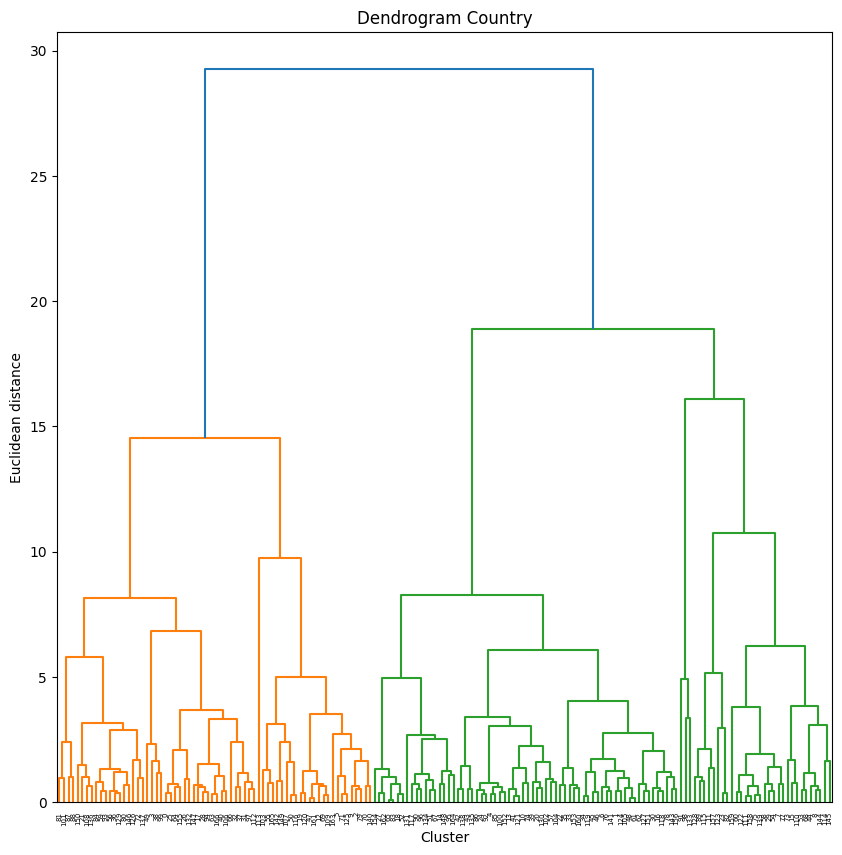

In [351]:
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrogram Country')
plt.xlabel('Cluster')
plt.ylabel('Euclidean distance')
plt.show()

In [352]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
df['hc_pca'] = y_hc

print(silhouette_score(pca_data_standard, y_hc))

0.3070110704080526


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Not PCA

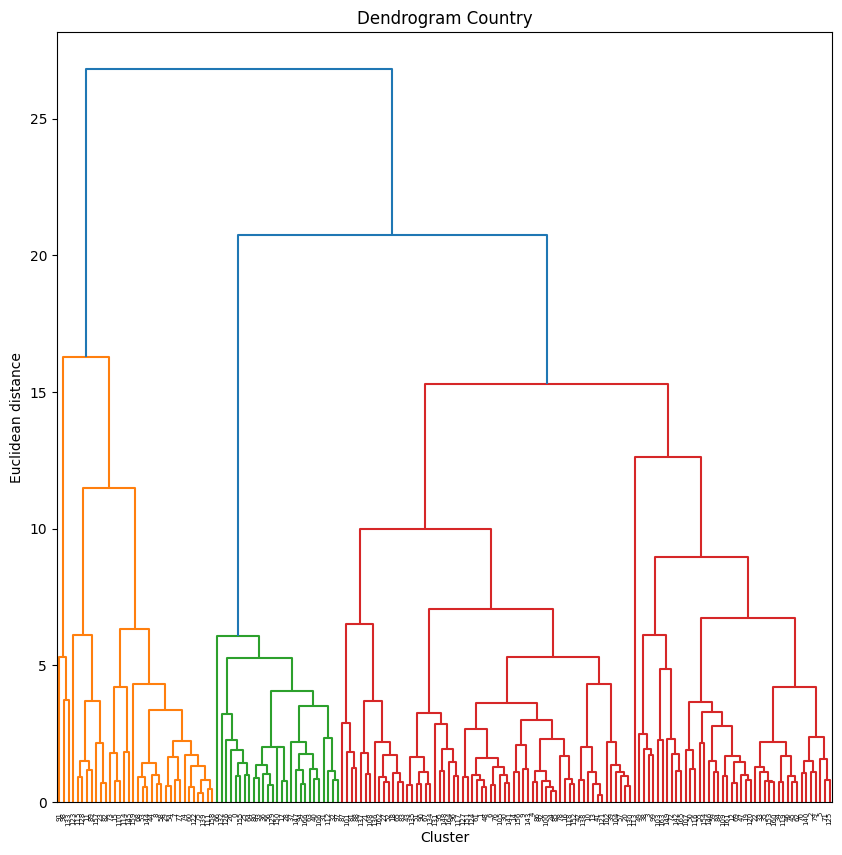

In [353]:
fig = plt.figure(figsize=(10, 10))
dendrogram_plot = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrogram Country')
plt.xlabel('Cluster')
plt.ylabel('Euclidean distance')
plt.show()

In [354]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)
df['hc'] = y_hc

print(silhouette_score(df_scaled, y_hc))

0.3153134331018189


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Hay varias razones potenciales por las cuales el puntaje de silueta puede ser peor cuando se usa PCA en su conjunto de datos en comparación con solo usar datos escalados. Algunas de las posibles razones son:

La estructura de los datos puede no ser adecuada para PCA y puede no estar capturando efectivamente los patrones subyacentes en el conjunto de datos.

PCA es una técnica de reducción de dimensionalidad lineal, por lo que puede no ser capaz de capturar relaciones no lineales entre las variables presentes en los datos.

Es posible que no tenga suficientes muestras de datos para que PCA funcione bien.

Es posible que el número de componentes principales que se han retenido sea demasiado alto y causando overfitting, lo que podría resultar en un puntaje de silueta más bajo.

Por último, es posible que los datos tengan una distribución no normal y PCA asume una distribución normal. En este caso, el uso de técnicas no paramétricas como MDS o t-SNE pueden ser más adecuadas.

Es importante tener en cuenta que el puntaje de silueta es una medida relativa de cómo similar es un objeto a su propio cluster en comparación con otros clusters, por lo que es importante tener en cuenta que un puntaje de silueta alto no implica que el agrupamiento sea bueno, sino que el agrupamiento no es malo. Siempre es bueno comprobar los resultados con otras métricas de validación de agrupamiento para obtener una mejor comprensión del desempeño del algoritmo de agrupamiento.

### Solving with DBSCAN

In [355]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, index = neighbors_fit.kneighbors(pca_data_standard)

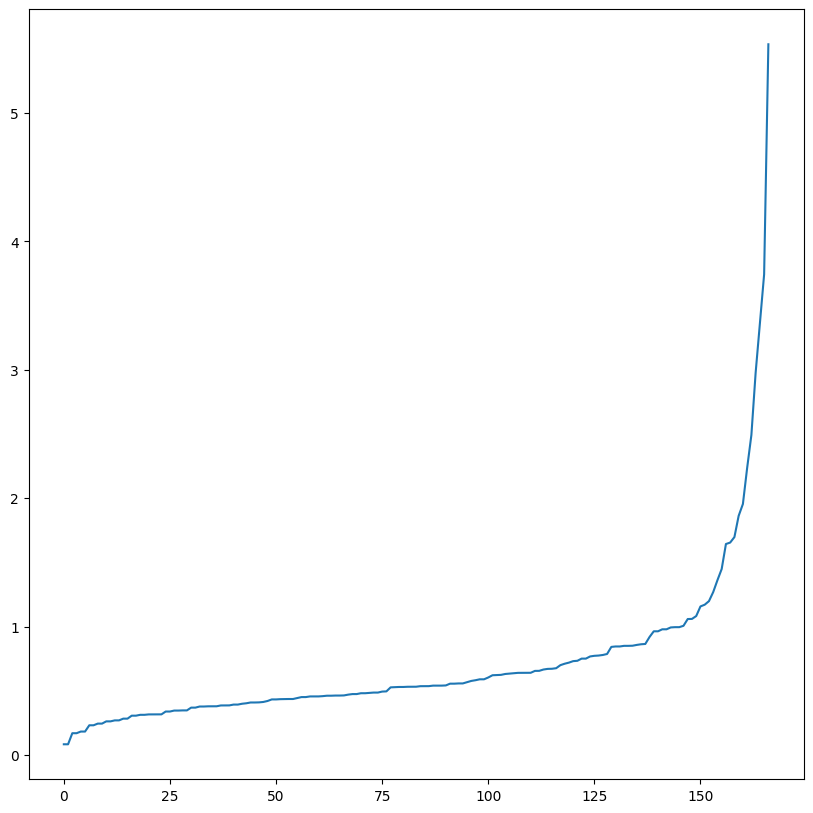

In [356]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fit = plt.figure(figsize=(10,10))
plt.plot(distances)

# Our knee is between 0.5 and 2

In [357]:
eps_values = np.arange(0.5, 2, 0.1)
min_samples = np.arange(3, 12)

In [358]:
from itertools import product 
dbscan_params = list(product(eps_values, min_samples))
no_clusters = []
sil_score = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard, y_dbscan))
    except:
        sil_score.append(0)

    no_clusters.append(len(np.unique(y_dbscan)))

In [359]:
df_param_tuning = pd.DataFrame.from_records(
    dbscan_params, columns=['eps', 'min_samples']
)

df_param_tuning['sil_score'] = sil_score
df_param_tuning['no_clusters'] = no_clusters

In [360]:
pivot_1 = pd.pivot_table(df_param_tuning, values='sil_score', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tuning, values='no_clusters', columns='eps', index='min_samples')

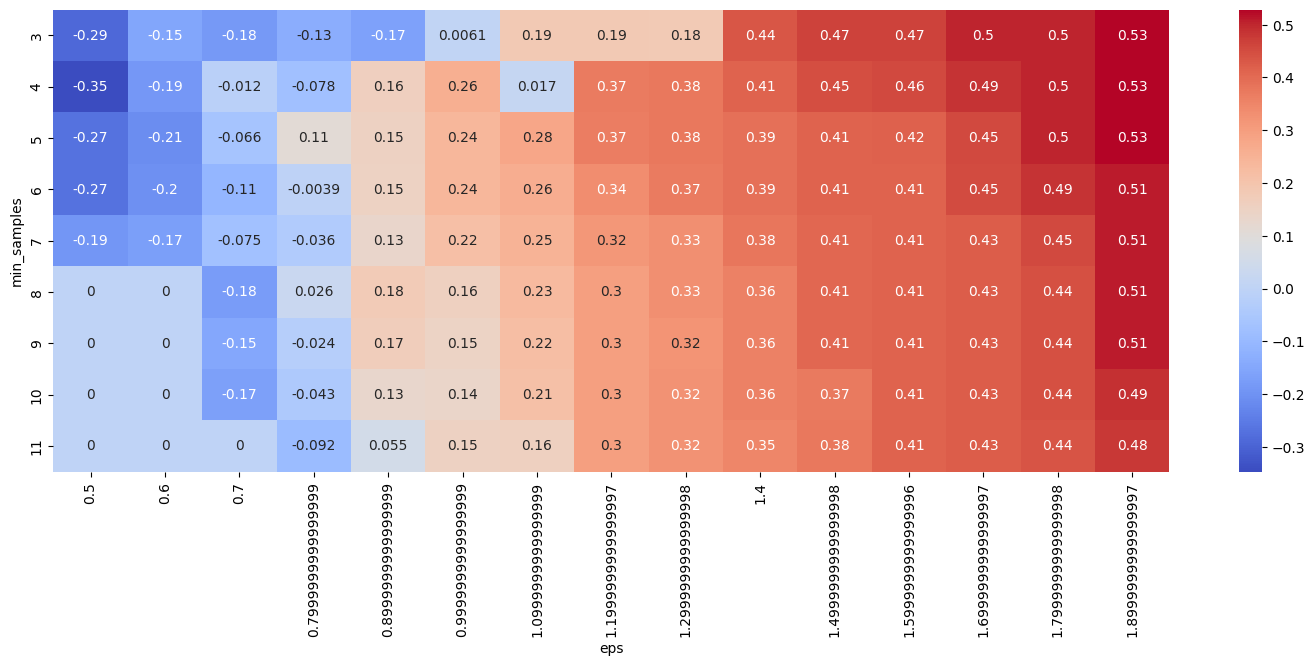

In [361]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

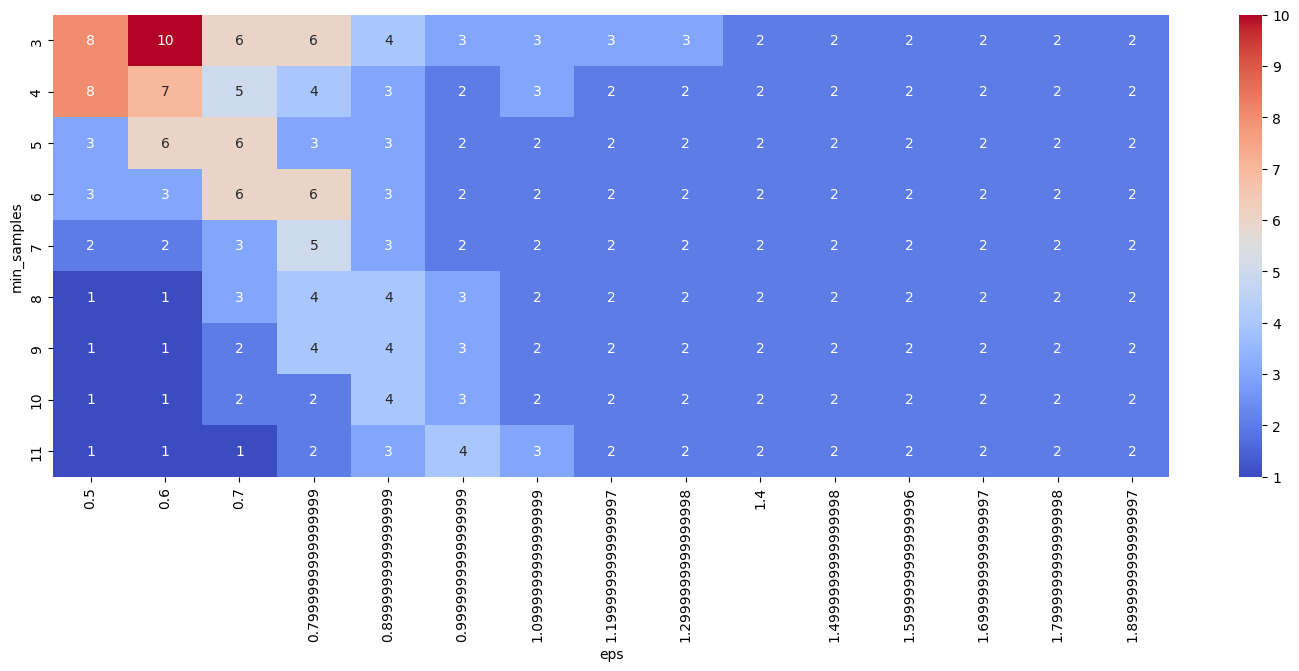

In [362]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [363]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
df['dbscan_pca'] = y_dbscan

print(silhouette_score(pca_data_standard, y_dbscan))

0.18591175730784337


### Not PCA

In [364]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

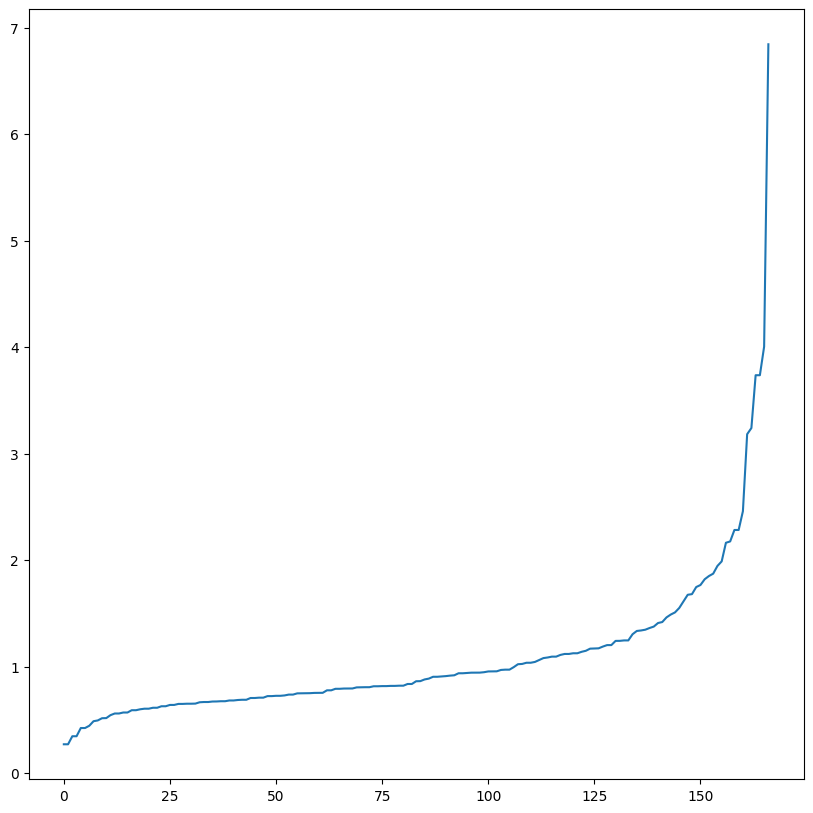

In [365]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fit = plt.figure(figsize=(10,10))
plt.plot(distances)

# Our knee is between 1 and 3

In [366]:
eps_values = np.arange(1, 3, 0.1)
min_samples = np.arange(3, 12)

In [367]:
from itertools import product 
dbscan_params = list(product(eps_values, min_samples))
no_clusters = []
sil_score = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_scaled)
    try:
        sil_score.append(silhouette_score(df_scaled, y_dbscan))
    except:
        sil_score.append(0)

    no_clusters.append(len(np.unique(y_dbscan)))

In [368]:
df_param_tuning = pd.DataFrame.from_records(
    dbscan_params, columns=['eps', 'min_samples']
)

df_param_tuning['sil_score'] = sil_score
df_param_tuning['no_clusters'] = no_clusters

In [369]:
pivot_1 = pd.pivot_table(df_param_tuning, values='sil_score', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tuning, values='no_clusters', columns='eps', index='min_samples')

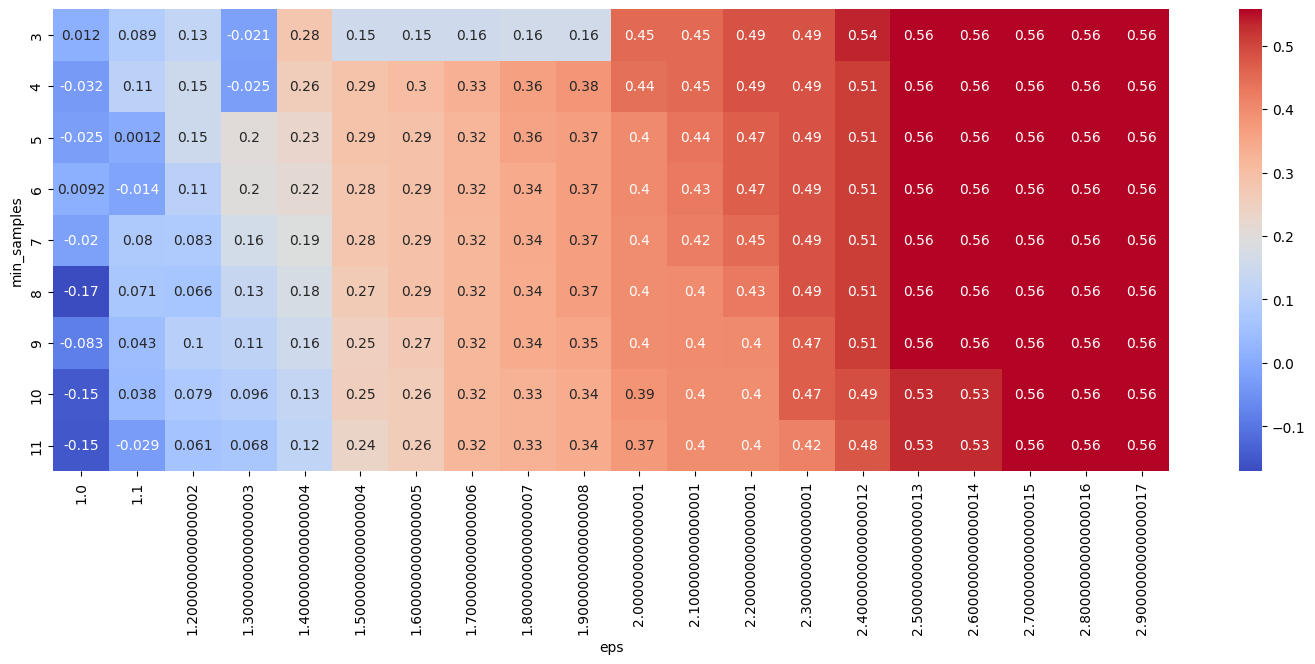

In [370]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

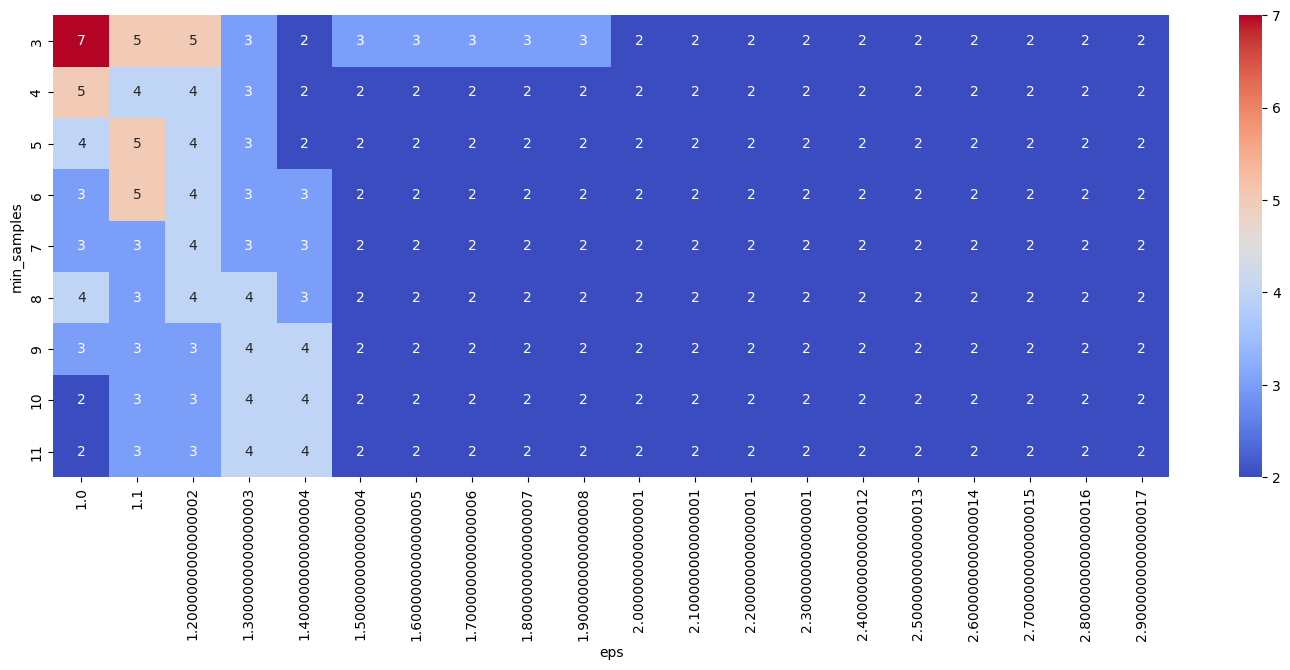

In [371]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [372]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_scaled)
df['dbscan_cluster'] = y_dbscan

print(silhouette_score(df_scaled, y_dbscan))

0.1563549566374231


In [373]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,2,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,2,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,1,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,0,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,1,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,2,1,0,0,0


### Evaluating Results

In [374]:
df[['child_mort', 'exports', 'health', 'imports', 'income',
    'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']]

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

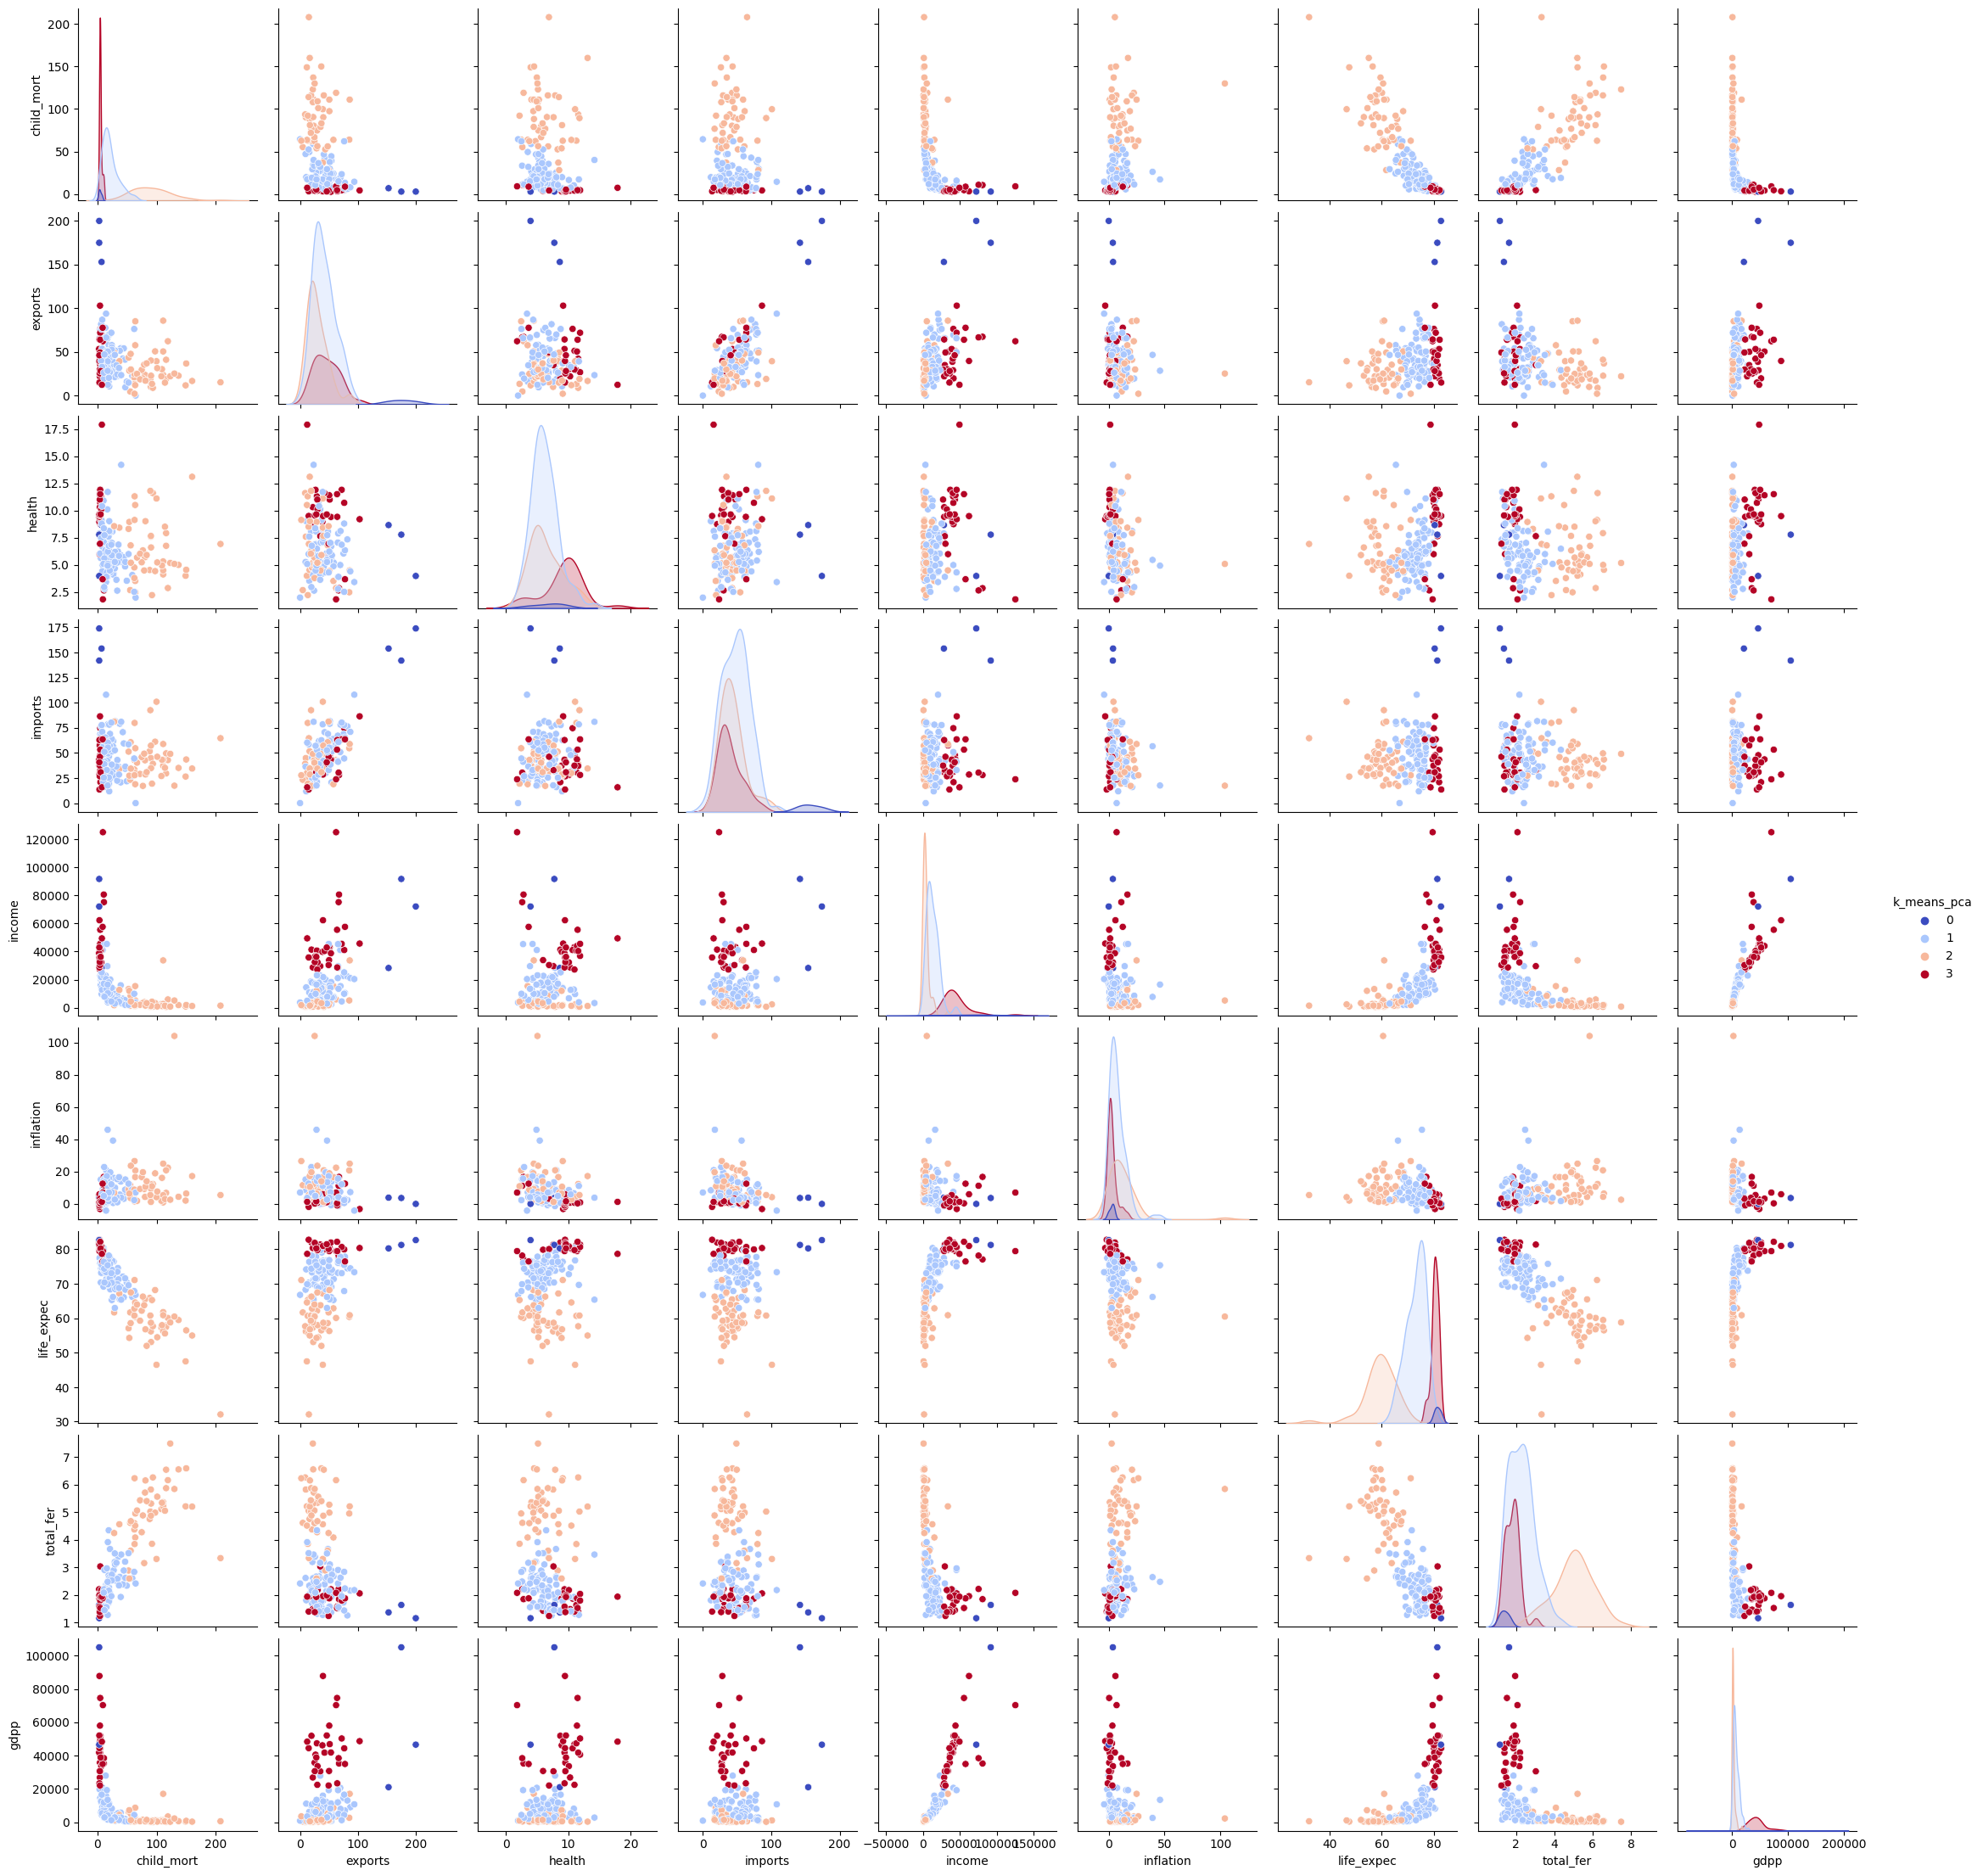

In [375]:
sns.pairplot(data=df[[
    'child_mort', 'exports', 'health', 'imports', 'income',
    'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca'
]], hue='k_means_pca', palette='coolwarm')

<AxesSubplot:xlabel='child_mort', ylabel='gdpp'>

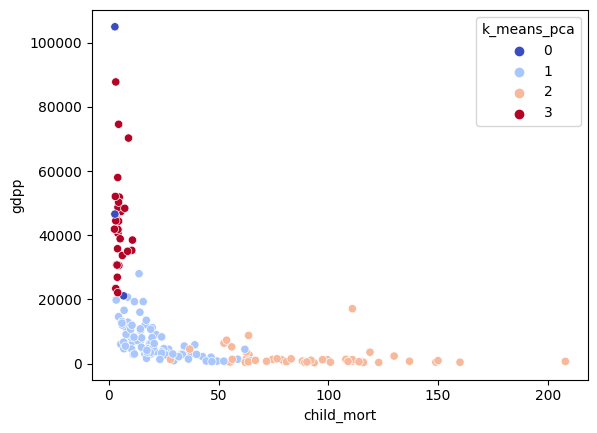

In [377]:
sns.scatterplot(df, x='child_mort', y='gdpp', hue='k_means_pca', palette='coolwarm')

In [380]:
df[df['k_means_pca']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,1,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1,0,0,0,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1,0,1,0,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,1,0,0,0,0,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,1,0,1,0,0,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,1,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,0,1,0,-1,-1


/var/folders/dm/bcgknb2j4l3fl130dnw68yxw0000gn/T/ipykernel_8437/651048267.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


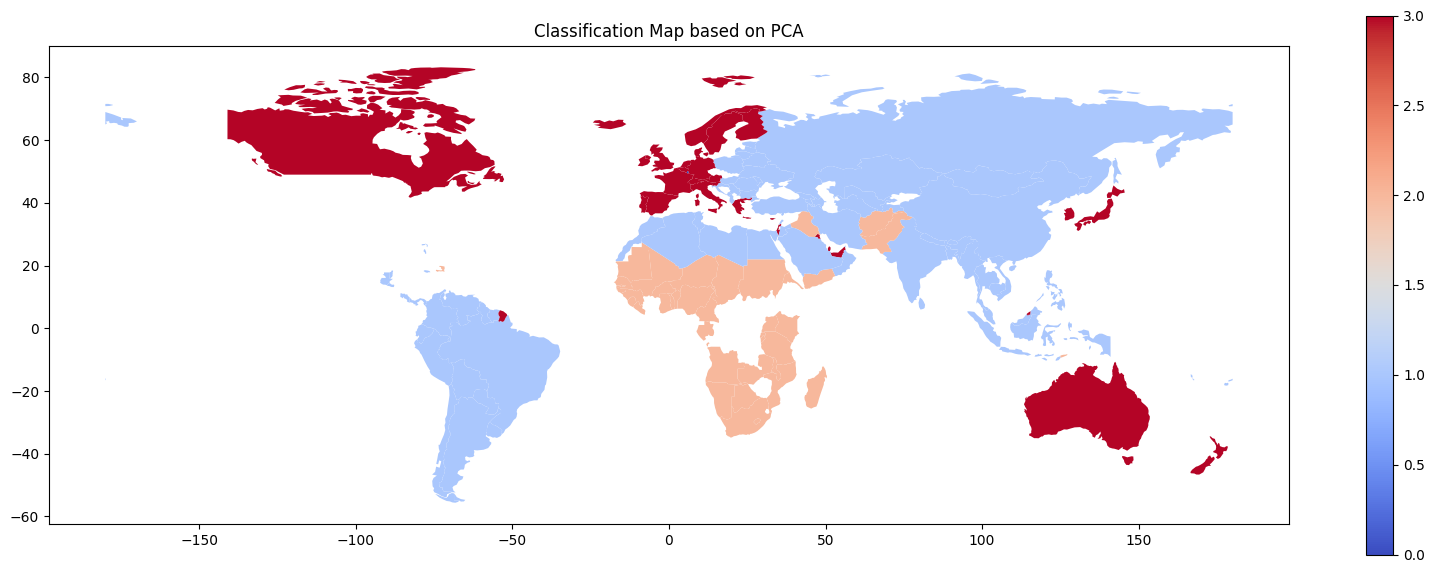

In [385]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geoespaciales del mundo y fusionarlos con el df
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Clasificacion = pd.DataFrame({'country':df.country,
                             'k_means_pca':df.k_means_pca})

world = world.merge(Clasificacion, how='left',left_on='name',right_on='country')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(20,7))

world.plot(ax=ax,column='k_means_pca',legend=True,cmap='coolwarm')

plt.title('Classification Map based on PCA')

plt.show()
